In [144]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [145]:
df_1 = pd.read_csv("365 database/365_course_info.csv")
df_2 = pd.read_csv("365 database/365_course_ratings.csv")
df_3 = pd.read_csv("365 database/365_exam_info.csv")
df_4 = pd.read_csv("365 database/365_quiz_info.csv")
df_5 = pd.read_csv("365 database/365_student_engagement.csv")
df_6 = pd.read_csv("365 database/365_student_exams.csv")
df_7 = pd.read_csv("365 database/365_student_hub_questions.csv")
df_8 = pd.read_csv("365 database/365_student_info.csv")
df_9 = pd.read_csv("365 database/365_student_learning.csv")
df_10 = pd.read_csv("365 database/365_student_purchases.csv")
df_11 = pd.read_csv("365 database/365_student_quizzes.csv")

In [146]:
df_8

,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01
...,...,...,...
35225,295511,CM,2022-10-20
35226,295512,CA,2022-10-20
35227,295513,SA,2022-10-20
35228,295514,NL,2022-10-20


In [147]:
dg = df_8["student_country"].value_counts()
dg

IN    6933
US    4768
EG    3003
GB    1748
NG    1718
      ... 
SR       1
RE       1
BI       1
GY       1
BM       1
Name: student_country, Length: 180, dtype: int64

In [148]:
top_5_highest_users = pd.DataFrame(dg[0:5])
top_5_highest_users["country"] = top_5_highest_users.index
top_5_highest_users.reset_index(drop=True,inplace=True)
top_5_highest_users = top_5_highest_users[["country","student_country"]]
chart_df_1 = top_5_highest_users.copy()
chart_df_1

,country,student_country
0,IN,6933
1,US,4768
2,EG,3003
3,GB,1748
4,NG,1718


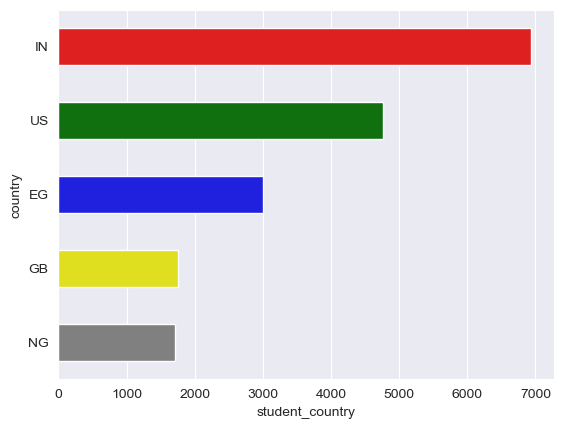

In [149]:
colours = ["red","green","blue","yellow","grey"]
chart1 = sns.barplot(data=chart_df_1,x="student_country",y="country",palette=colours,orient="h",width=0.5)

In [150]:
df_9

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07
...,...,...,...,...
64530,295509,23,0.8,2022-10-20
64531,295510,53,0.1,2022-10-20
64532,295511,7,7.8,2022-10-20
64533,295512,7,10.4,2022-10-20


In [151]:
data_2 = df_9.merge(df_8,how="inner",on="student_id")
data_2

,student_id,course_id,minutes_watched,date_watched,student_country,date_registered
0,258798,23,0.3,2022-01-01,IN,2022-01-01
1,258800,2,12.9,2022-04-01,CA,2022-01-01
2,258800,7,46.8,2022-01-03,CA,2022-01-01
3,258800,7,4.3,2022-01-04,CA,2022-01-01
4,258800,7,31.7,2022-01-07,CA,2022-01-01
...,...,...,...,...,...,...
64530,295509,23,0.8,2022-10-20,EG,2022-10-20
64531,295510,53,0.1,2022-10-20,IN,2022-10-20
64532,295511,7,7.8,2022-10-20,CM,2022-10-20
64533,295512,7,10.4,2022-10-20,CA,2022-10-20


In [152]:
data_3 = data_2[["student_country","minutes_watched"]]
data_3

,student_country,minutes_watched
0,IN,0.3
1,CA,12.9
2,CA,46.8
3,CA,4.3
4,CA,31.7
...,...,...
64530,EG,0.8
64531,IN,0.1
64532,CM,7.8
64533,CA,10.4


In [153]:
data_4 = data_3.groupby(by="student_country")
total_sum = data_4.sum()
total_avg = data_4.mean()
total_sum["student_country"] = total_sum.index
total_avg["student_country"] = total_avg.index
total_sum = total_sum.reset_index(drop=True)
total_avg = total_avg.reset_index(drop=True)
total_sum = total_sum[["student_country","minutes_watched"]]
total_avg["average_minutes_watched"] = total_avg["minutes_watched"]
total_avg.drop("minutes_watched",axis=1,inplace=True)
total_avg = total_avg[["student_country","average_minutes_watched"]]
k = total_sum.merge(total_avg,how="inner",on="student_country")
q = k.sort_values(by="minutes_watched",inplace=False,ascending=False)
country_minutes_watched = q[0:5]
chart_df_2 = country_minutes_watched.copy()

In [154]:
k

,student_country,minutes_watched,average_minutes_watched
0,AD,195.9,21.766667
1,AE,26057.8,33.885306
2,AG,6.2,6.200000
3,AL,1050.8,30.905882
4,AM,2213.5,50.306818
...,...,...,...
168,XK,13.1,13.100000
169,YE,320.6,12.824000
170,ZA,12928.1,25.299609
171,ZM,1240.7,20.678333


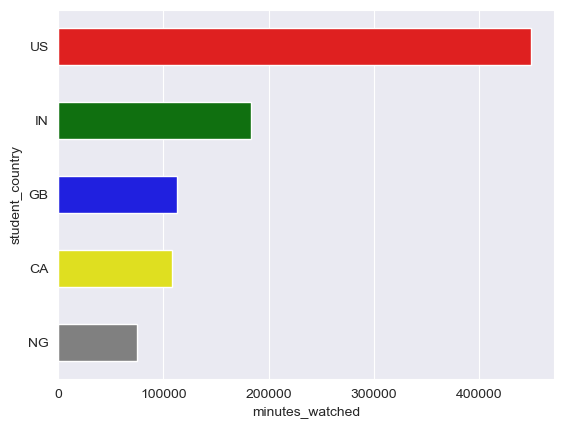

In [155]:
colours = ["red","green","blue","yellow","grey"]
chart2 = sns.barplot(x=chart_df_2["minutes_watched"],y=chart_df_2["student_country"],palette=colours,orient="h",width=0.5)

In [156]:
df_9

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07
...,...,...,...,...
64530,295509,23,0.8,2022-10-20
64531,295510,53,0.1,2022-10-20
64532,295511,7,7.8,2022-10-20
64533,295512,7,10.4,2022-10-20


In [157]:
df_9["date_watched"] = pd.to_datetime(df_9["date_watched"])
da = df_9[["minutes_watched","date_watched"]]
da

,minutes_watched,date_watched
0,0.3,2022-01-01
1,12.9,2022-04-01
2,46.8,2022-01-03
3,4.3,2022-01-04
4,31.7,2022-01-07
...,...,...
64530,0.8,2022-10-20
64531,0.1,2022-10-20
64532,7.8,2022-10-20
64533,10.4,2022-10-20


In [158]:
da["month_name"] = da["date_watched"].dt.month_name()
da["month_number"] = da["date_watched"].dt.month
da

,minutes_watched,date_watched,month_name,month_number
0,0.3,2022-01-01,January,1
1,12.9,2022-04-01,April,4
2,46.8,2022-01-03,January,1
3,4.3,2022-01-04,January,1
4,31.7,2022-01-07,January,1
...,...,...,...,...
64530,0.8,2022-10-20,October,10
64531,0.1,2022-10-20,October,10
64532,7.8,2022-10-20,October,10
64533,10.4,2022-10-20,October,10


In [159]:
df_0 = da[["month_name","month_number","minutes_watched"]]
df_00 = da[["month_name","month_number"]]
df = df_0[["month_name","month_number","minutes_watched"]]
df

,month_name,month_number,minutes_watched
0,January,1,0.3
1,April,4,12.9
2,January,1,46.8
3,January,1,4.3
4,January,1,31.7
...,...,...,...
64530,October,10,0.8
64531,October,10,0.1
64532,October,10,7.8
64533,October,10,10.4


In [160]:
df_groups = df.groupby(["month_name","month_number"])
names = dict(df_groups.groups.keys())
names

{'April': 4,
 'August': 8,
 'February': 2,
 'January': 1,
 'July': 7,
 'June': 6,
 'March': 3,
 'May': 5,
 'October': 10,
 'September': 9}

In [161]:
mini = df_groups.sum()
avg = df_groups.mean()

In [162]:
dframe = mini.copy()
dframe["total_minutes_watched"] = mini["minutes_watched"]
dframe["average_minutes_watched"] = avg["minutes_watched"]
ind = dict(dframe.index)
dframe["month_name"] = ind.keys()
dframe["month_number"] = ind.values()
dframe.drop("minutes_watched",axis=1,inplace=True)
dframe = dframe.reset_index(drop=True)
dframe = dframe[["month_name","month_number","total_minutes_watched","average_minutes_watched"]]
dframe = dframe.sort_values(by='total_minutes_watched',ascending=False,inplace=False)
dframe = dframe.reset_index(drop=True)
dframe = dframe.drop("month_number",axis=1,inplace=False)

In [163]:
dframe

,month_name,total_minutes_watched,average_minutes_watched
0,August,323322.7,31.895304
1,September,204191.5,25.749243
2,July,203366.5,29.303530
3,June,192599.5,27.860480
4,October,186561.1,27.088878
5,March,179715.1,29.680446
6,April,173665.8,29.911436
7,May,161828.4,28.271908
8,February,129973.1,28.341278
9,January,86953.2,24.445656


In [164]:
chart_df_3 = dframe.loc[0:4,]

In [165]:
chart_df_3

,month_name,total_minutes_watched,average_minutes_watched
0,August,323322.7,31.895304
1,September,204191.5,25.749243
2,July,203366.5,29.303530
3,June,192599.5,27.860480
4,October,186561.1,27.088878


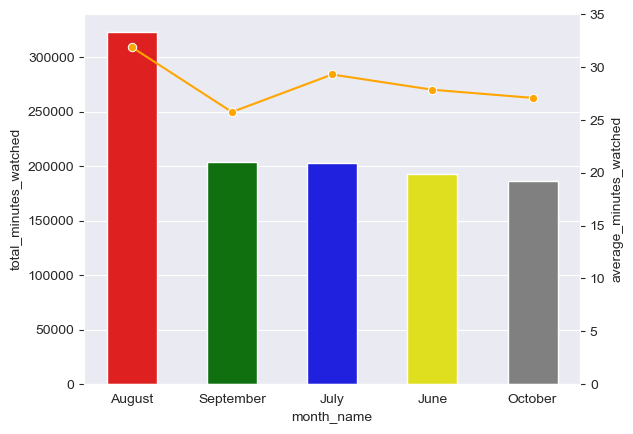

In [166]:
colours = ["red","green","blue","yellow","grey"]
ax3 = sns.barplot(data=chart_df_3,x="month_name",y="total_minutes_watched",width=0.5,palette=colours)
ax4 = ax3.twinx()
sns.lineplot(data=chart_df_3,x="month_name",y="average_minutes_watched",ax=ax4,color="orange",marker="o")
ax4.grid(False)
ax4.set(ylim=(0,35))
chart3 = ax4

In [167]:
er = df_8.copy()

In [168]:
er

,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01
...,...,...,...
35225,295511,CM,2022-10-20
35226,295512,CA,2022-10-20
35227,295513,SA,2022-10-20
35228,295514,NL,2022-10-20


In [169]:
er["date_registered"] = pd.to_datetime(er["date_registered"])
er

,student_id,student_country,date_registered
0,258798,IN,2022-01-01
1,258799,CO,2022-01-01
2,258800,CA,2022-01-01
3,258801,IN,2022-01-01
4,258802,US,2022-01-01
...,...,...,...
35225,295511,CM,2022-10-20
35226,295512,CA,2022-10-20
35227,295513,SA,2022-10-20
35228,295514,NL,2022-10-20


In [170]:
er["month_registered"] = er["date_registered"].dt.month_name()

In [171]:
er

,student_id,student_country,date_registered,month_registered
0,258798,IN,2022-01-01,January
1,258799,CO,2022-01-01,January
2,258800,CA,2022-01-01,January
3,258801,IN,2022-01-01,January
4,258802,US,2022-01-01,January
...,...,...,...,...
35225,295511,CM,2022-10-20,October
35226,295512,CA,2022-10-20,October
35227,295513,SA,2022-10-20,October
35228,295514,NL,2022-10-20,October


In [172]:
er1 = er[["month_registered","student_id"]]
er1

,month_registered,student_id
0,January,258798
1,January,258799
2,January,258800
3,January,258801
4,January,258802
...,...,...
35225,October,295511
35226,October,295512
35227,October,295513
35228,October,295514


In [173]:
er2 = er1.groupby(by="month_registered")
er3 = er2.count()
er4 = er3.sort_values(by="student_id",inplace=False,ascending=False)
er5 = er4[0:5]

In [174]:
er5

,student_id
month_registered,
August,5523
June,4152
March,3591
September,3370
January,3312


In [175]:
er5["month_registered"] = er5.index
er6 = er5.reset_index(drop=True)
er6 = er6[["month_registered","student_id"]]
chart_df_4 = er6.copy()
chart_df_4

,month_registered,student_id
0,August,5523
1,June,4152
2,March,3591
3,September,3370
4,January,3312


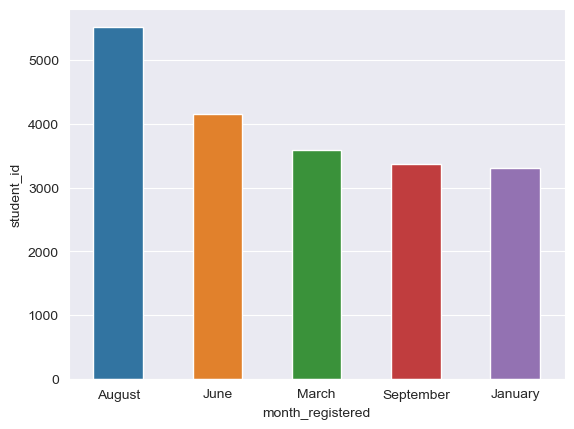

In [177]:
chart4 = sns.barplot(data=chart_df_4,x="month_registered",y="student_id",width=0.5)

In [186]:
df_1

,course_id,course_title
0,2,Introduction to Tableau
1,3,The Complete Data Visualization Course with Py...
2,4,Introduction to R Programming
3,5,Data Preprocessing with NumPy
4,7,Introduction to Data and Data Science
5,11,Data Cleaning and Preprocessing with pandas
6,12,Introduction to Business Analytics
7,13,Data Analysis with Excel Pivot Tables
8,14,SQL
9,15,Credit Risk Modeling in Python


In [187]:
df_9

,student_id,course_id,minutes_watched,date_watched
0,258798,23,0.3,2022-01-01
1,258800,2,12.9,2022-04-01
2,258800,7,46.8,2022-01-03
3,258800,7,4.3,2022-01-04
4,258800,7,31.7,2022-01-07
...,...,...,...,...
64530,295509,23,0.8,2022-10-20
64531,295510,53,0.1,2022-10-20
64532,295511,7,7.8,2022-10-20
64533,295512,7,10.4,2022-10-20


In [215]:
news1 = df_9.copy()
news = news1.merge(df_1,how="inner",on="course_id")
news = news[["course_title","course_id","minutes_watched"]]
news

,course_title,course_id,minutes_watched
0,Introduction to Excel,23,0.3
1,Introduction to Excel,23,29.0
2,Introduction to Excel,23,0.8
3,Introduction to Excel,23,15.5
4,Introduction to Excel,23,0.1
...,...,...,...
64459,Machine Learning with Ridge and Lasso Regression,56,0.9
64460,Machine Learning with Ridge and Lasso Regression,56,27.7
64461,Machine Learning with Ridge and Lasso Regression,56,6.2
64462,Machine Learning with Ridge and Lasso Regression,56,0.1


In [248]:
news_tot = news.groupby(by=["course_title",'course_id'])
news_total = news_tot.sum()
news_total["avg_minutes"] = news_tot.mean()
news_total["course_title"] = list(dict(news_total.index).keys())
news_total["course_id"] = list(dict(news_total.index).values())
news_total = news_total.reset_index(drop=True)
news_total = news_total[["course_id","course_title","minutes_watched","avg_minutes"]]
news_total

,course_id,course_title,minutes_watched,avg_minutes
0,53,A/B Testing in Python,3989.1,19.846269
1,48,AI Applications for Business Success,1262.3,20.036508
2,39,Advanced Microsoft Excel,14894.6,26.788849
3,41,Convolutional Neural Networks with TensorFlow ...,4125.6,34.668908
4,15,Credit Risk Modeling in Python,19716.3,23.669028
5,33,Customer Analytics in Python,8137.4,28.452448
6,13,Data Analysis with Excel Pivot Tables,38021.0,35.801318
7,11,Data Cleaning and Preprocessing with pandas,25412.0,37.206442
8,46,Data Literacy,51092.2,37.077068
9,5,Data Preprocessing with NumPy,44323.8,48.125733


In [249]:
df_22 = df_2[["course_id","course_rating"]]
rating_tot = df_22.groupby(by='course_id')
rating_total = rating_tot.sum()
rating_total["avg_rating"] = rating_tot.mean()
rating_total["count_rating"] = rating_tot.count()
rating_total["course_id"] = rating_total.index
rating_total = rating_total.reset_index(drop=True)
rating_total = rating_total[["course_id","course_rating","avg_rating","count_rating"]]
rating_total

,course_id,course_rating,avg_rating,count_rating
0,2,185,4.625000,40
1,3,160,4.705882,34
2,4,122,4.880000,25
3,5,152,4.903226,31
4,7,2779,4.858392,572
5,11,245,4.622642,53
6,12,61,4.357143,14
7,13,436,4.844444,90
8,14,602,4.816000,125
9,15,80,4.705882,17


In [250]:
final_total = news_total.merge(rating_total,how="inner",on="course_id")
final_total

,course_id,course_title,minutes_watched,avg_minutes,course_rating,avg_rating,count_rating
0,53,A/B Testing in Python,3989.1,19.846269,57,4.750000,12
1,48,AI Applications for Business Success,1262.3,20.036508,17,4.250000,4
2,39,Advanced Microsoft Excel,14894.6,26.788849,243,4.860000,50
3,41,Convolutional Neural Networks with TensorFlow ...,4125.6,34.668908,19,4.750000,4
4,15,Credit Risk Modeling in Python,19716.3,23.669028,80,4.705882,17
5,33,Customer Analytics in Python,8137.4,28.452448,55,5.000000,11
6,13,Data Analysis with Excel Pivot Tables,38021.0,35.801318,436,4.844444,90
7,11,Data Cleaning and Preprocessing with pandas,25412.0,37.206442,245,4.622642,53
8,46,Data Literacy,51092.2,37.077068,345,4.791667,72
9,5,Data Preprocessing with NumPy,44323.8,48.125733,152,4.903226,31


In [251]:
table = final_total[["course_title","minutes_watched","avg_minutes","count_rating","avg_rating"]]
table

,course_title,minutes_watched,avg_minutes,count_rating,avg_rating
0,A/B Testing in Python,3989.1,19.846269,12,4.750000
1,AI Applications for Business Success,1262.3,20.036508,4,4.250000
2,Advanced Microsoft Excel,14894.6,26.788849,50,4.860000
3,Convolutional Neural Networks with TensorFlow ...,4125.6,34.668908,4,4.750000
4,Credit Risk Modeling in Python,19716.3,23.669028,17,4.705882
5,Customer Analytics in Python,8137.4,28.452448,11,5.000000
6,Data Analysis with Excel Pivot Tables,38021.0,35.801318,90,4.844444
7,Data Cleaning and Preprocessing with pandas,25412.0,37.206442,53,4.622642
8,Data Literacy,51092.2,37.077068,72,4.791667
9,Data Preprocessing with NumPy,44323.8,48.125733,31,4.903226
